Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import math 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')    

 Exploration of Data

In [2]:
df = pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Treating Null Values

In [6]:
df['cigsPerDay'][df['cigsPerDay'].isnull() == True ] = round(np.mean(df['cigsPerDay']) , 0)
df['BPMeds'][df['BPMeds'].isnull() == True] = 1 
df['totChol'][df['totChol'].isnull() == True ] = np.mean(df['totChol'])
df['BMI'][df['BMI'].isnull() == True ] = np.mean(df['BMI'])
df['heartRate'][df['heartRate'].isnull() == True ] = np.mean(df['heartRate'])
df['glucose'][df['glucose'].isnull() == True ] = np.mean(df['glucose'])
df['education'][df['education'].isnull() == True ] = round(np.mean(df['education']) , 0)

In [7]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,9.003067,0.041765,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.879230,0.200075,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
'''creating feature name list for ease in futhure coding '''

contFeat = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose']
discreteFeat = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes']
discreteFeat_withy = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes' , 'TenYearCHD']

Data Vislualization

Pair Plot

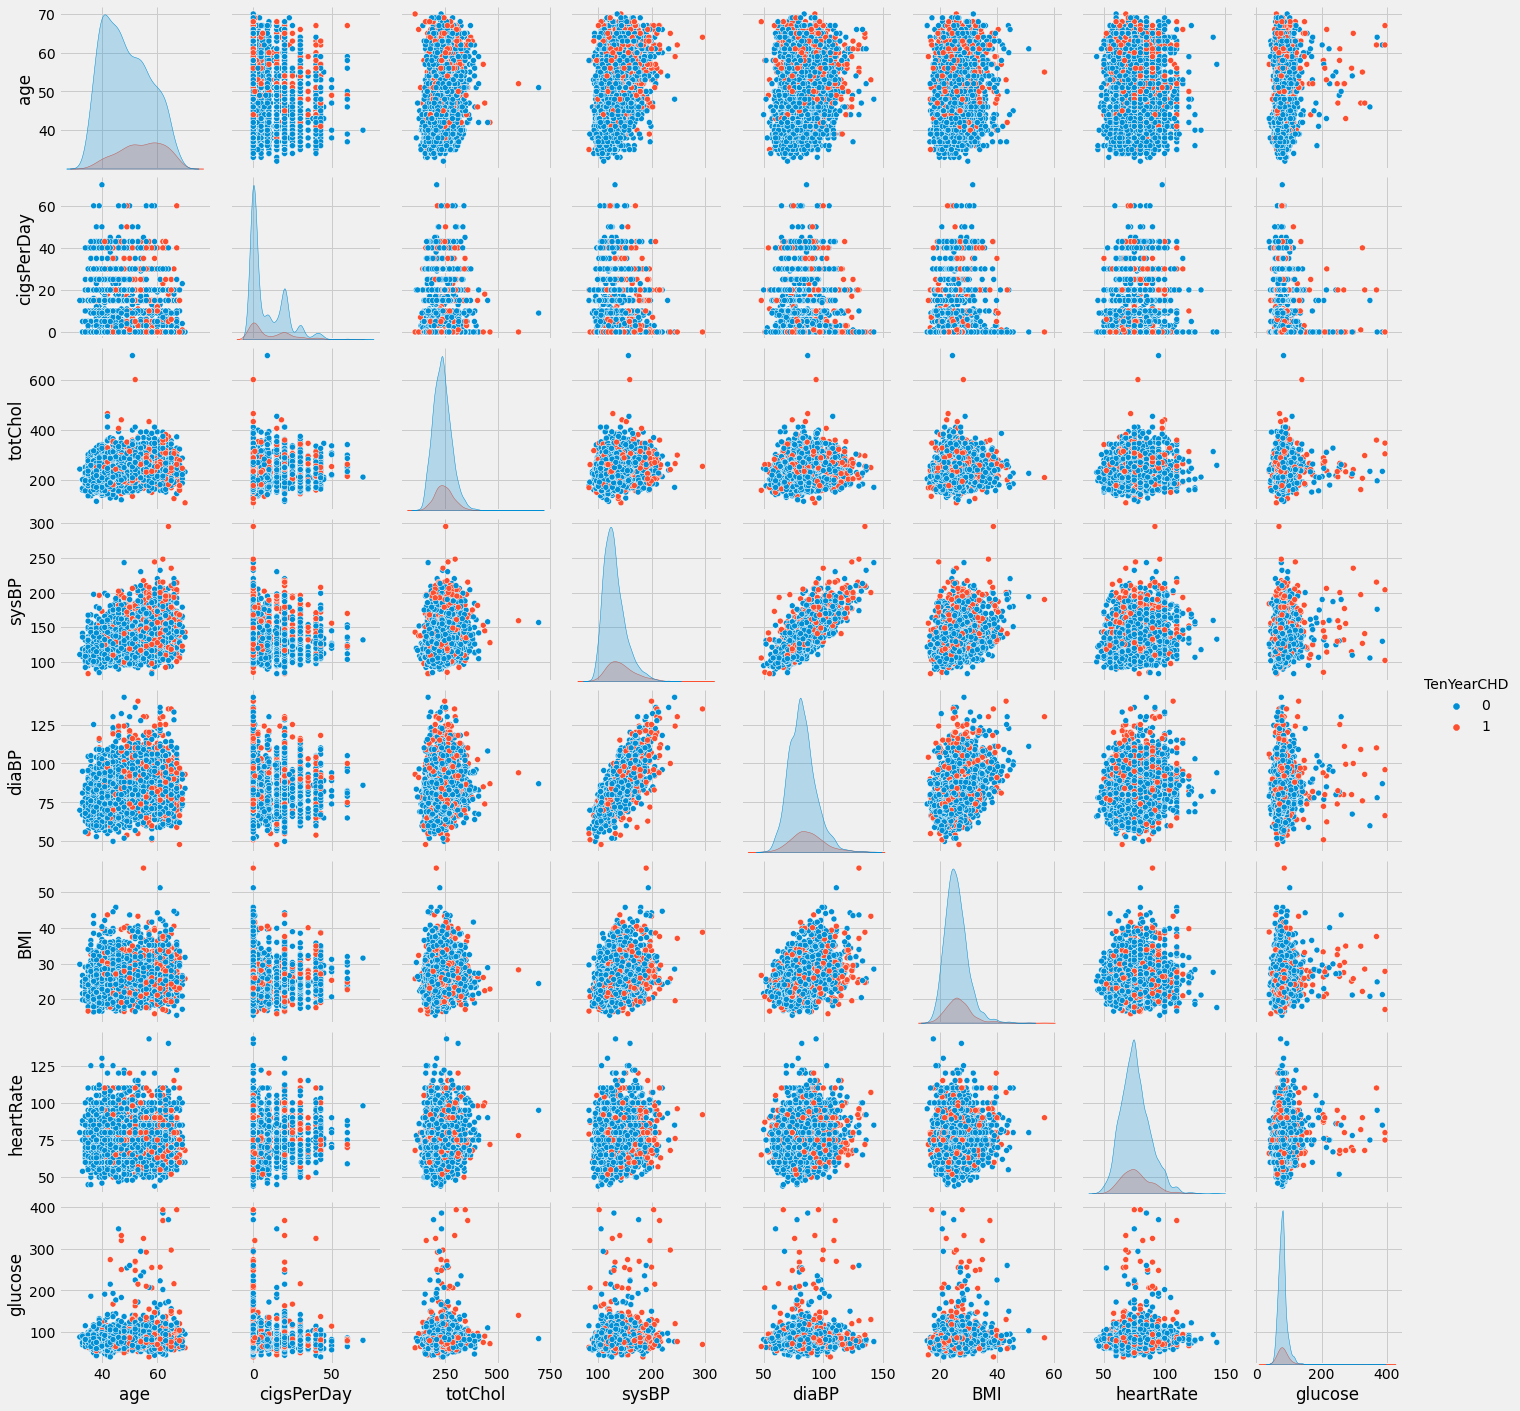

In [10]:
plt.style.use('fivethirtyeight')

sns.pairplot(df , hue = 'TenYearCHD',
             vars = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose'])
plt.show()

Insightful Count Plots

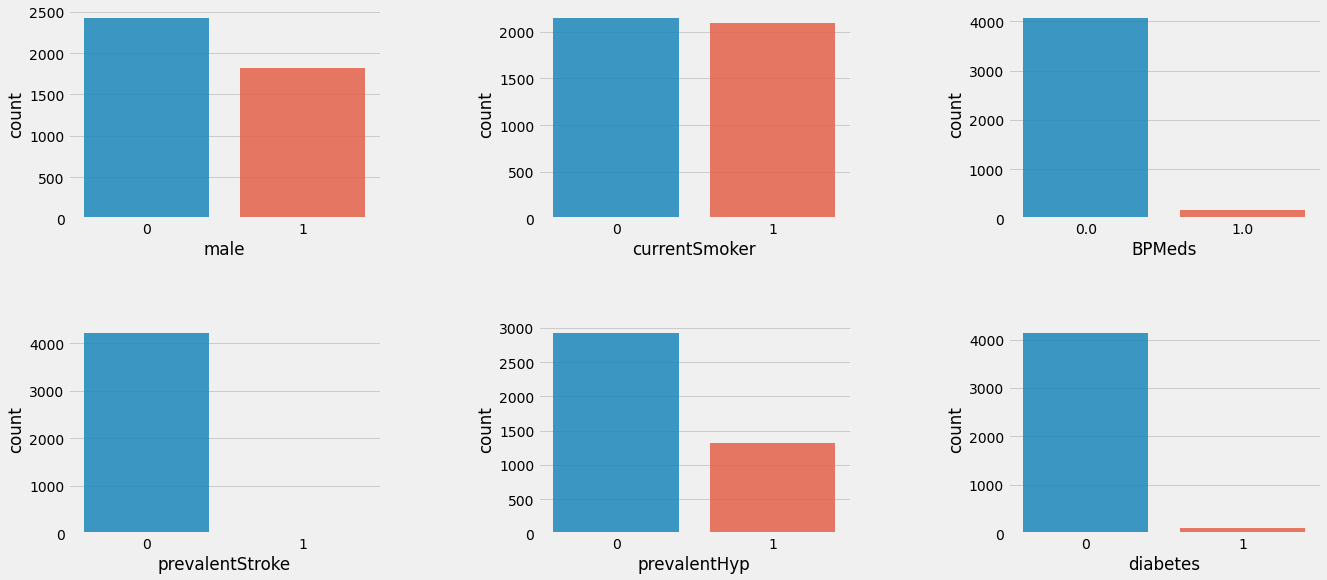

In [11]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , data = df , alpha = 0.85)

plt.show()

Systolic Blood Pressuer and Diastolic Blood Pressure are highly correlated to eachother

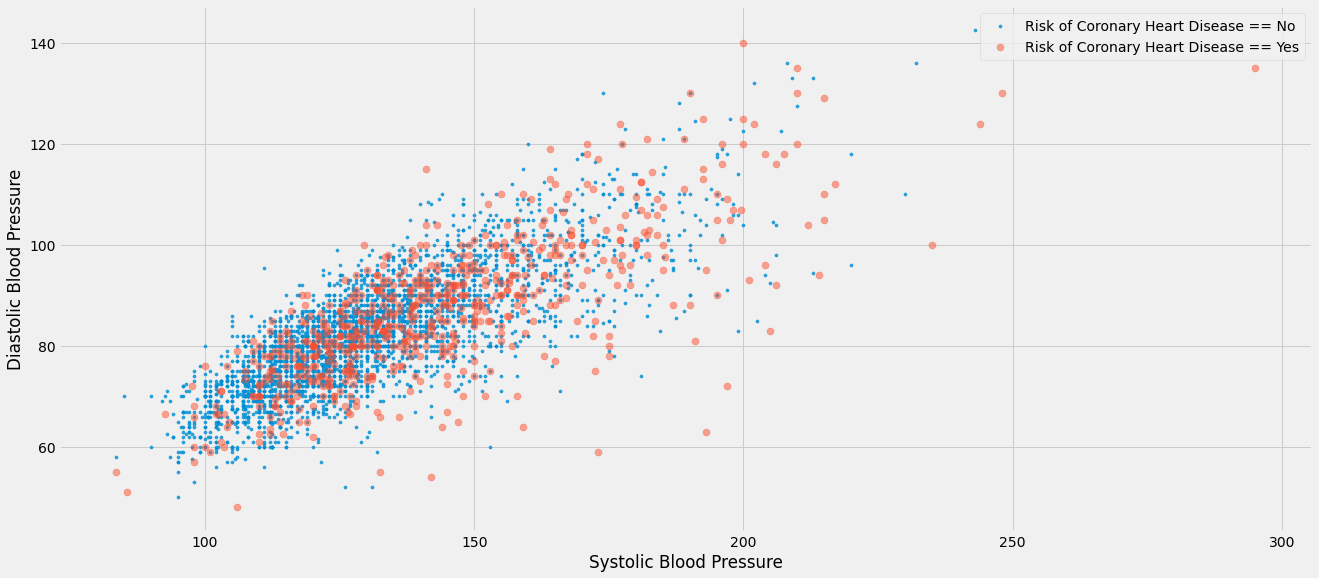

In [12]:

plt.figure(1 , figsize = (20 , 9))

plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 10 , data = df[df['TenYearCHD'] == 0] , 
            label = 'Risk of Coronary Heart Disease == No' , alpha = 0.8 )
plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 50 , data = df[df['TenYearCHD'] == 1] , 
            label = 'Risk of Coronary Heart Disease == Yes' , alpha = 0.5 )

plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.legend()


Encrypt and Decrypt Files

In [13]:
pip install cryptography

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.8 MB/s eta 0:00:00


Creating a Key

In [14]:
from cryptography.fernet import Fernet

In [15]:
key = Fernet.generate_key()

with open('mykey.key', 'wb') as mykey:
    mykey.write(key)

Loading a Key

In [16]:
with open('mykey.key', 'rb') as mykey:
    key = mykey.read()

print(key)

b'WdJBYVky-ELCwzB6fvuHA6o42lkjISxL95Cn7mndv5E='


Encrypting a File

In [17]:

f = Fernet(key)

with open('/content/framingham.csv', 'rb') as original_file:
    original = original_file.read()

encrypted = f.encrypt(original)

with open ('/content/enc_files.csv', 'wb') as encrypted_file:
    encrypted_file.write(encrypted)

Decrypting a File

In [18]:
f = Fernet(key)

with open('/content/enc_files.csv', 'rb') as encrypted_file:
    encrypted = encrypted_file.read()

decrypted = f.decrypt(encrypted)

with open('/content/framingham.csv', 'wb') as decrypted_file:
    decrypted_file.write(decrypted)